In [13]:
import os
import random
import pandas as pd #導入pandas函式庫(用於資料處理)
import numpy as np
import matplotlib.pyplot as plt#導入matplotlib函式庫(用於繪圖)
import seaborn as sns#導入seaborn函式庫(用於繪圖)
#導入各種函式庫

In [14]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

讀取全部資料並合併

In [15]:
train_file_paths = [f'36_TrainingData/L{i}_Train.csv' for i in range(1, 18)]#讀取全部訓練資料
df_list = [pd.read_csv(file) for file in train_file_paths]
df_data = pd.concat(df_list, ignore_index=True)#將訓練資料合併
df_all_data = pd.concat(df_list, ignore_index=True)

讀取單一資料

In [16]:
i = input('請輸入要讀取的資料編號(1~17):')
while i.isdigit() == False or int(i) < 1 or int(i) > 17:
    i = input('輸入錯誤，請重新輸入:')
    
train_file_paths_single = f'36_TrainingData/L{i}_Train.csv'#讀取單一資料
df_data = pd.read_csv(train_file_paths_single)
print(f'已讀取第{i}筆資料')

已讀取第3筆資料


In [17]:
df_data["DateTime"] = pd.to_datetime(df_data["DateTime"])#將時間轉換為pandas的時間格式
df_data.describe()#顯示資料的描述性統計
#df_data.isnull().sum(axis=0)

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,55380.0,55380,55380.000000,55380.000000,55380.000000,55380.000000,55380.000000,55380.000000
mean,3.0,2024-04-25 04:16:28.561231360,0.397456,1007.682379,30.697832,69.215456,26485.444595,320.369273
min,3.0,2024-03-09 14:06:42,0.000000,994.240000,12.450000,15.220000,20.000000,0.000000
25%,3.0,2024-03-28 17:03:53,0.000000,1004.010000,23.890000,45.290000,4275.000000,5.060000
50%,3.0,2024-04-24 16:21:30,0.000000,1007.120000,29.370000,70.030000,13467.085000,50.620000
75%,3.0,2024-05-18 15:57:25,0.440000,1011.290000,37.370000,99.240000,36791.325000,353.415000
max,3.0,2024-07-10 11:10:07,9.670000,1022.130000,54.150000,100.000000,117758.200000,2459.300000
std,0.0,NaN,0.819855,4.874686,8.376141,25.795770,31092.301453,529.486801


<Axes: >

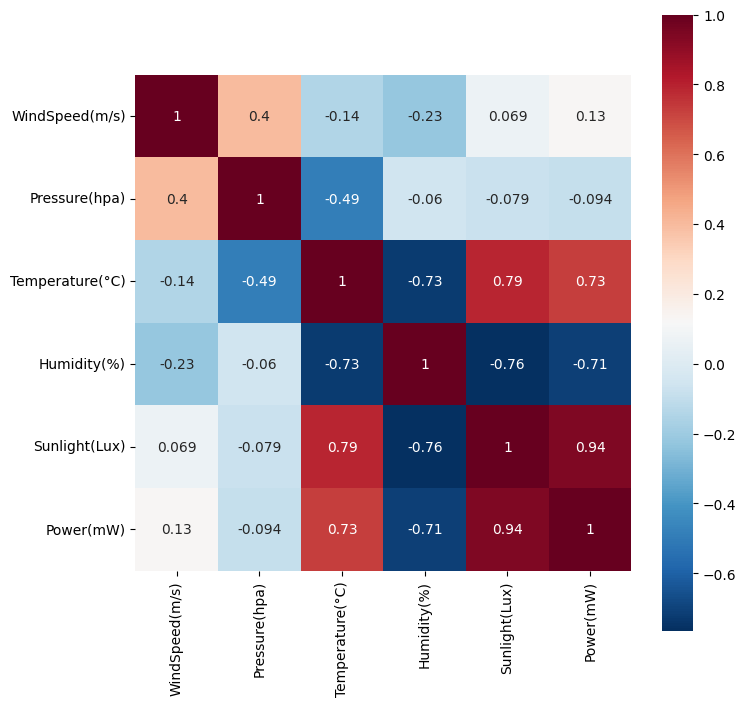

In [18]:
# correlation 計算
corr = df_data[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

In [19]:
#df_data = df_data.drop(columns=['WindSpeed(m/s)', 'Pressure(hpa)'])


<Axes: >

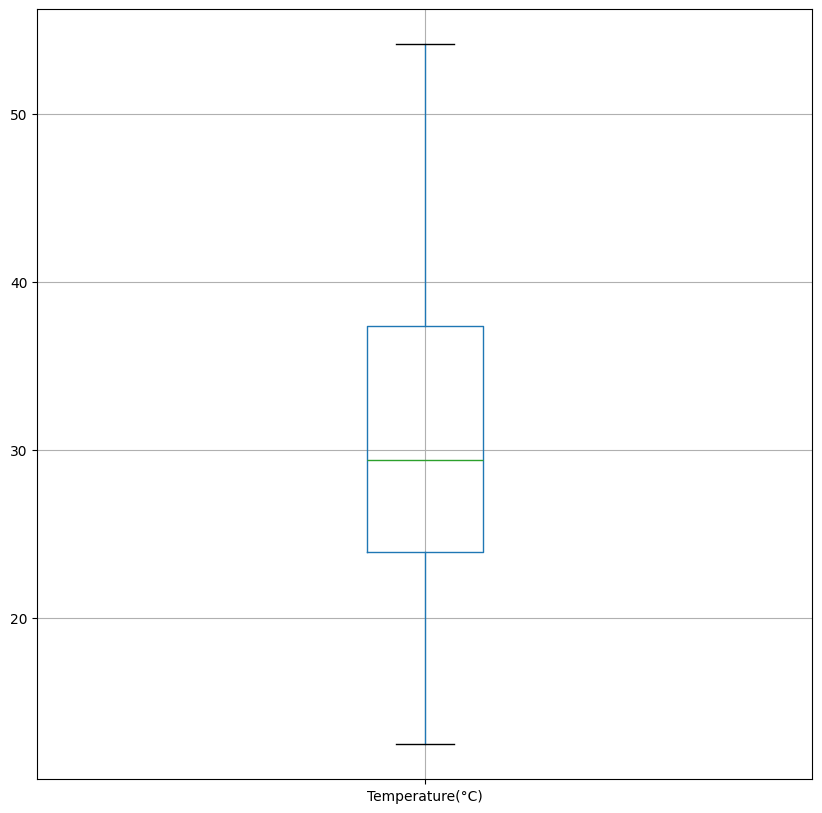

In [20]:
df_data.boxplot(column=['Temperature(°C)'], figsize=(10, 10))

<Axes: >

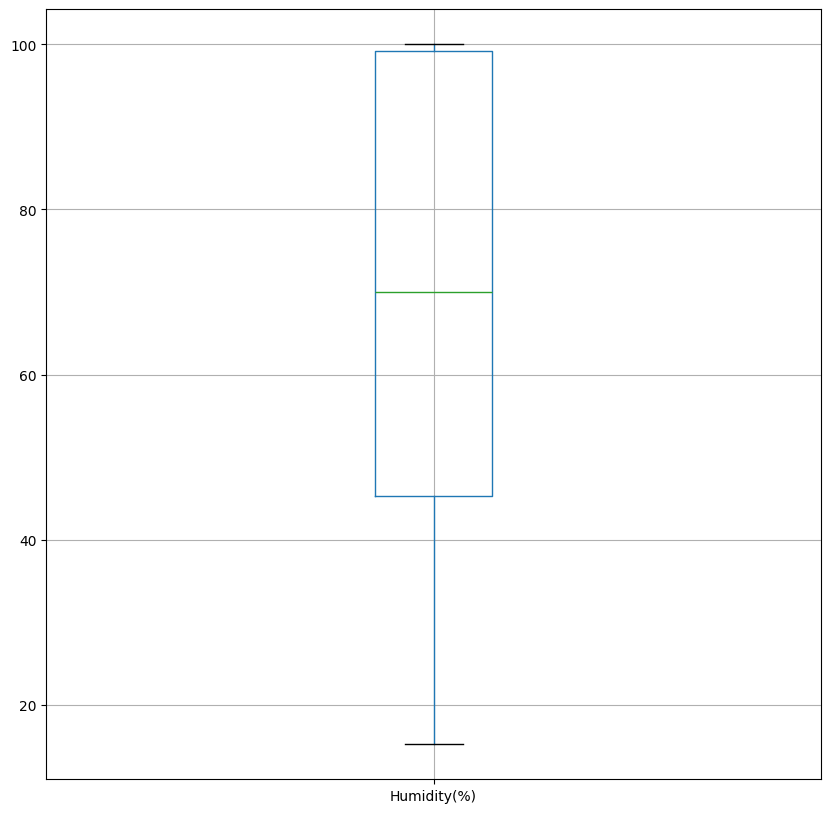

In [21]:
df_data.boxplot(column=['Humidity(%)'], figsize=(10, 10))

<Axes: >

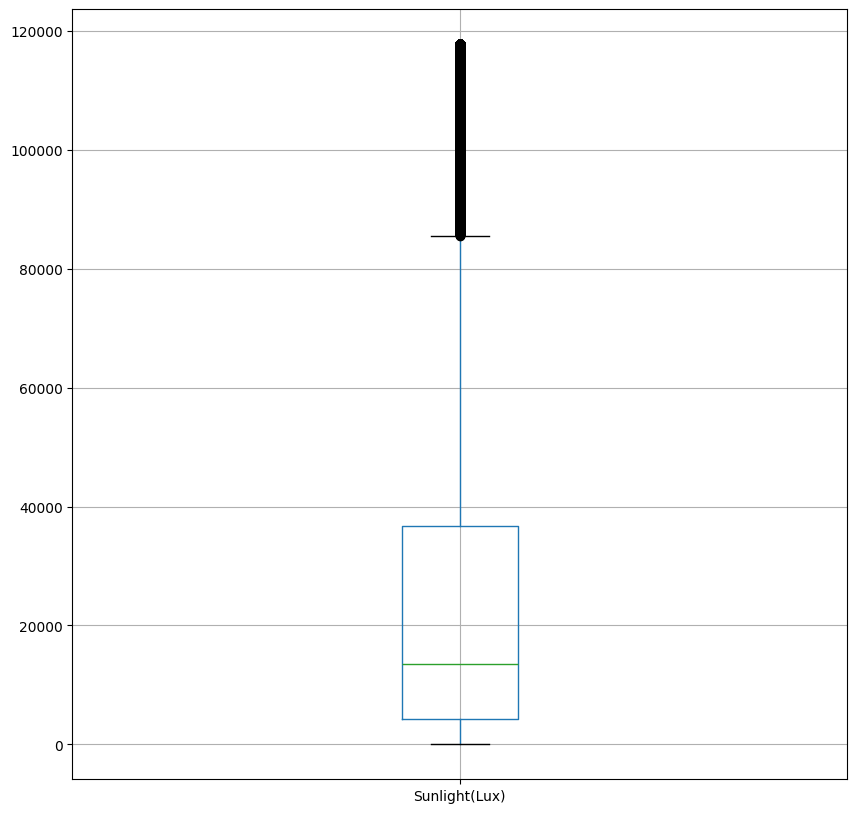

In [22]:
df_data.boxplot(column=['Sunlight(Lux)'], figsize=(10, 10))

<Axes: >

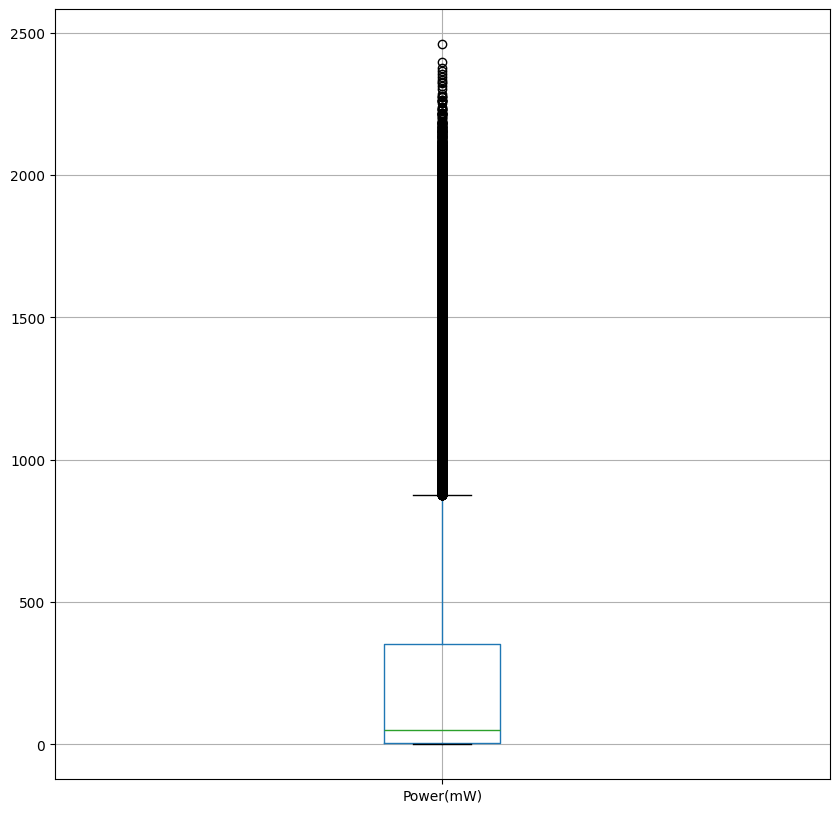

In [23]:
df_data.boxplot(column=['Power(mW)'], figsize=(10, 10))

In [24]:
df_data.to_csv(f'Analysised_TrainData/L{i}_Train_analysised.csv', index=False)
df_all_data.to_csv(f'Analysised_TrainData/All_Train_analysised.csv', index=False)
